In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_fscore_support,roc_curve
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.drop_duplicates(inplace = True)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Split the data into development and test datasets

In [3]:
X = df.drop(columns = 'Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Examining the class Imbalance

In [4]:
print("There are "+str(len(df))
      +" observations in the dataset.")

print("There are "+str(sum(df["Diabetes_binary"]==1))
      +" positives (1) and "
      +str(sum(df["Diabetes_binary"]==0))
      +" negatives (0).")

There are 229474 observations in the dataset.
There are 35097 positives (1) and 194377 negatives (0).


# Decision Tree without Smote

In [5]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_dev, y_dev)

y_pred_dev_tree = clf.predict(X_dev)
y_pred_test_tree = clf.predict(X_test)

dev_acc_tree = sum(np.where(y_pred_dev_tree == y_dev, 1, 0))/y_dev.shape[0]
test_acc_tree = sum(np.where(y_pred_test_tree == y_test, 1, 0))/y_test.shape[0]

print(classification_report(y_test, y_pred_test_tree))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     38813
         1.0       0.29      0.32      0.31      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.59     45895
weighted avg       0.78      0.77      0.78     45895



Development Set:
Accuracy : 0.9946
Precision :  0.9968540201470466
Recall :  0.9824201320721042
F1 Score :  0.9894748208638658


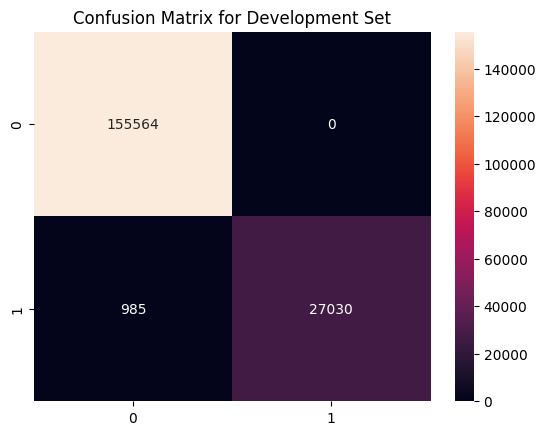

Test Set:
Accuracy : 0.7732
Precision :  0.5817887516439091
Recall :  0.5894202720750994
F1 Score :  0.5850841769073898


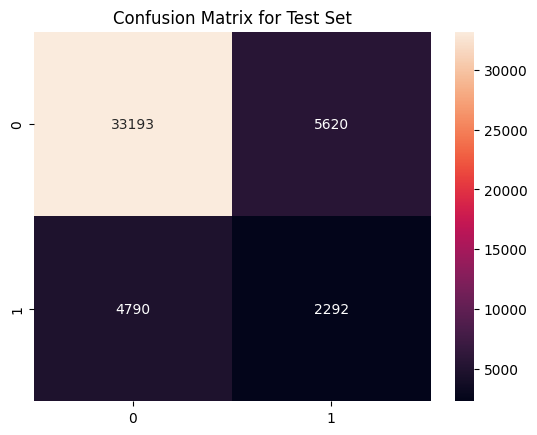

In [6]:
print("Development Set:")
print("Accuracy : {:0.4f}".format(dev_acc_tree))
scores = precision_recall_fscore_support(y_dev, y_pred_dev_tree, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_dev, y_pred_dev_tree)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Development Set")
plt.show()

print("Test Set:")
print("Accuracy : {:0.4f}".format(test_acc_tree))
scores = precision_recall_fscore_support(y_test, y_pred_test_tree, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_test, y_pred_test_tree)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Test Set")
plt.show()

## Hyperparameters

In [7]:
max_depths = [10, 50, 100]
alpha = np.logspace(-8, -6, 3)
params = {'max_depth': max_depths, 'ccp_alpha' : alpha}

clf_tuned = GridSearchCV(tree.DecisionTreeClassifier(), params, cv = 3, verbose = 5, scoring = 'recall')
clf_tuned.fit(X_dev, y_dev)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....ccp_alpha=1e-08, max_depth=10;, score=0.137 total time=   0.2s
[CV 2/3] END .....ccp_alpha=1e-08, max_depth=10;, score=0.154 total time=   0.2s
[CV 3/3] END .....ccp_alpha=1e-08, max_depth=10;, score=0.183 total time=   0.2s
[CV 1/3] END .....ccp_alpha=1e-08, max_depth=50;, score=0.321 total time=   0.4s
[CV 2/3] END .....ccp_alpha=1e-08, max_depth=50;, score=0.332 total time=   0.4s
[CV 3/3] END .....ccp_alpha=1e-08, max_depth=50;, score=0.325 total time=   0.4s
[CV 1/3] END ....ccp_alpha=1e-08, max_depth=100;, score=0.321 total time=   0.4s
[CV 2/3] END ....ccp_alpha=1e-08, max_depth=100;, score=0.325 total time=   0.4s
[CV 3/3] END ....ccp_alpha=1e-08, max_depth=100;, score=0.326 total time=   0.4s
[CV 1/3] END .....ccp_alpha=1e-07, max_depth=10;, score=0.136 total time=   0.2s
[CV 2/3] END .....ccp_alpha=1e-07, max_depth=10;, score=0.154 total time=   0.2s
[CV 3/3] END .....ccp_alpha=1e-07, max_depth=10;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([1.e-08, 1.e-07, 1.e-06]),
                         'max_depth': [10, 50, 100]},
             scoring='recall', verbose=5)

## Report optimal hyperparameters and performance of the optimal model

In [8]:
best = clf_tuned.best_params_
print("Best Hyperparameters : ", best)

print(classification_report(y_test, clf_tuned.predict(X_test)))

Best Hyperparameters :  {'ccp_alpha': 1e-06, 'max_depth': 100}
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     38813
         1.0       0.29      0.32      0.30      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895



## Feature Importance

[Text(0.5, 1.0, 'Decision Tree (without SMOTE) Feature Importance')]

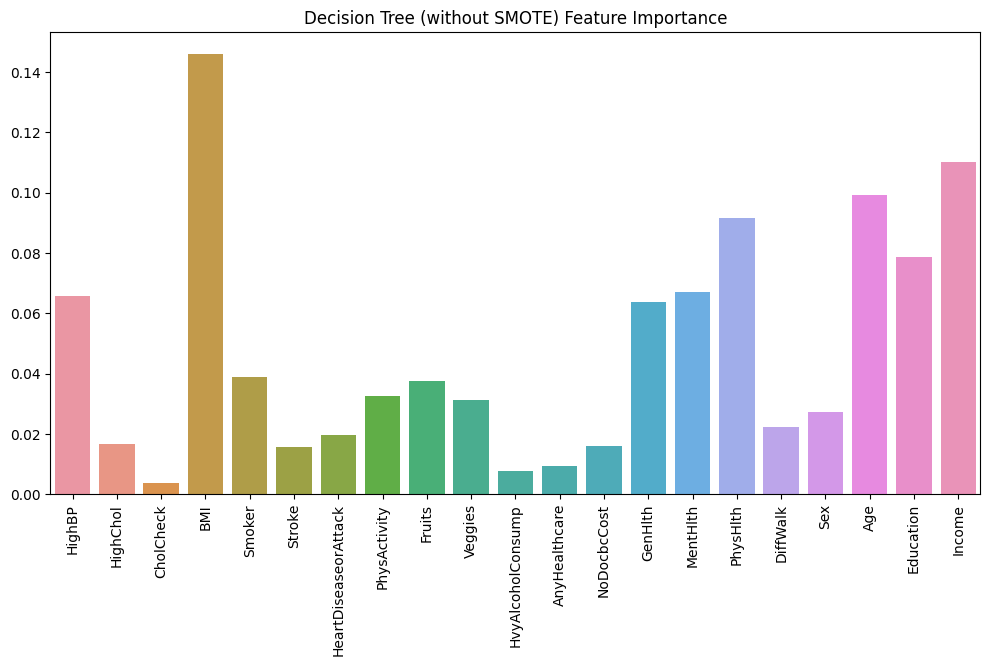

In [9]:
features = X_dev.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = clf_tuned.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)
ax.set(title = "Decision Tree (without SMOTE) Feature Importance")

# Decision Tree with Smote

In [10]:
smote = SMOTE(random_state = 42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print("There are "+str(y_dev_smote.value_counts()[1])+" positive and "
     +str(y_dev_smote.value_counts()[0])+" negative labels after SMOTE.")
print("The shape of development dataset is: "+str(X_dev_smote.shape))
y_dev_smote.value_counts()

There are 155564 positive and 155564 negative labels after SMOTE.
The shape of development dataset is: (311128, 21)


1.0    155564
0.0    155564
Name: Diabetes_binary, dtype: int64

###  Train a Decision Tree model on the SMOTE development dataset using RandomForestClassifier with default parameters

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_dev_smote, y_dev_smote)

y_pred_dev_tree_smote = clf.predict(X_dev)
y_pred_test_tree_smote = clf.predict(X_test)

dev_acc_tree_smote = sum(np.where(y_pred_dev_tree_smote == y_dev, 1, 0))/y_dev.shape[0]
test_acc_tree_smote = sum(np.where(y_pred_test_tree_smote == y_test, 1, 0))/y_test.shape[0]

print(classification_report(y_test, y_pred_test_tree_smote))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     38813
         1.0       0.29      0.32      0.30      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895



Development Set:
Accuracy on Dev Set  : 0.9946
Precision :  0.9968540201470466
Recall :  0.9824201320721042
F1 Score :  0.9894748208638658


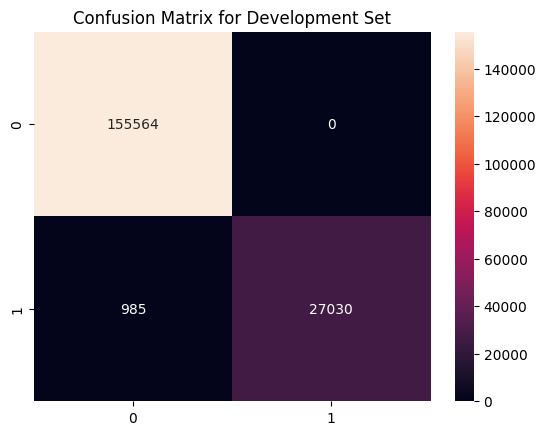

Test Set:
Accuracy on Test Set : 0.7719
Precision :  0.5791285130622774
Recall :  0.586338565441187
F1 Score :  0.582244151683372


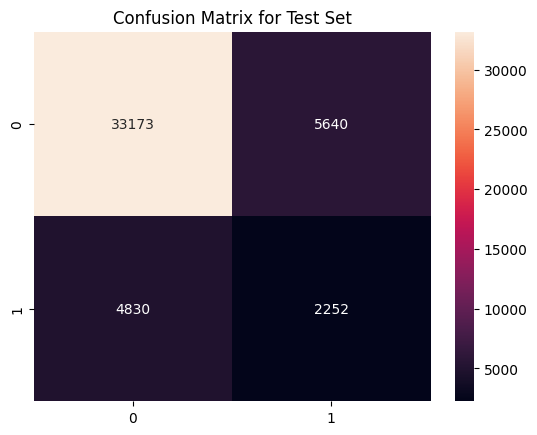

In [12]:
print("Development Set:")
print("Accuracy on Dev Set  : {:0.4f}".format(dev_acc_tree_smote))
scores = precision_recall_fscore_support(y_dev, y_pred_dev_tree_smote, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_dev, y_pred_dev_tree_smote)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Development Set")
plt.show()

print("Test Set:")
print("Accuracy on Test Set : {:0.4f}".format(test_acc_tree_smote))
scores = precision_recall_fscore_support(y_test, y_pred_test_tree_smote, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_test, y_pred_test_tree_smote)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Test Set")
plt.show()

## Hyperparameters

In [13]:
max_depths = [10, 50, 100]
alpha = np.logspace(-8, -6, 3)
params = {'max_depth': max_depths, 'ccp_alpha' : alpha}

clf_tuned_smote = GridSearchCV(tree.DecisionTreeClassifier(), params, cv = 3, verbose = 5, scoring = 'recall')
clf_tuned_smote.fit(X_dev, y_dev)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....ccp_alpha=1e-08, max_depth=10;, score=0.137 total time=   0.2s
[CV 2/3] END .....ccp_alpha=1e-08, max_depth=10;, score=0.154 total time=   0.3s
[CV 3/3] END .....ccp_alpha=1e-08, max_depth=10;, score=0.183 total time=   0.3s
[CV 1/3] END .....ccp_alpha=1e-08, max_depth=50;, score=0.328 total time=   0.4s
[CV 2/3] END .....ccp_alpha=1e-08, max_depth=50;, score=0.332 total time=   0.4s
[CV 3/3] END .....ccp_alpha=1e-08, max_depth=50;, score=0.328 total time=   0.4s
[CV 1/3] END ....ccp_alpha=1e-08, max_depth=100;, score=0.328 total time=   0.4s
[CV 2/3] END ....ccp_alpha=1e-08, max_depth=100;, score=0.331 total time=   0.4s
[CV 3/3] END ....ccp_alpha=1e-08, max_depth=100;, score=0.327 total time=   0.4s
[CV 1/3] END .....ccp_alpha=1e-07, max_depth=10;, score=0.136 total time=   0.2s
[CV 2/3] END .....ccp_alpha=1e-07, max_depth=10;, score=0.154 total time=   0.2s
[CV 3/3] END .....ccp_alpha=1e-07, max_depth=10;,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([1.e-08, 1.e-07, 1.e-06]),
                         'max_depth': [10, 50, 100]},
             scoring='recall', verbose=5)

## Report optimal hyperparameters and performance of the optimal model

In [14]:
best = clf_tuned_smote.best_params_
print("Best Hyperparameters : ", best)

print("\n")

y_pred_clf_tuned_smote = clf_tuned_smote.predict(X_test)
clf_tuned_test_acc_smote = sum(np.where(y_pred_clf_tuned_smote == y_test, 1, 0))/y_test.shape[0]

print(classification_report(y_test, y_pred_clf_tuned_smote))

Best Hyperparameters :  {'ccp_alpha': 1e-08, 'max_depth': 50}


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86     38813
         1.0       0.29      0.32      0.30      7082

    accuracy                           0.77     45895
   macro avg       0.58      0.59      0.58     45895
weighted avg       0.78      0.77      0.78     45895



## Feature Importance

[Text(0.5, 1.0, 'Decision Tree (with SMOTE) Feature Importance')]

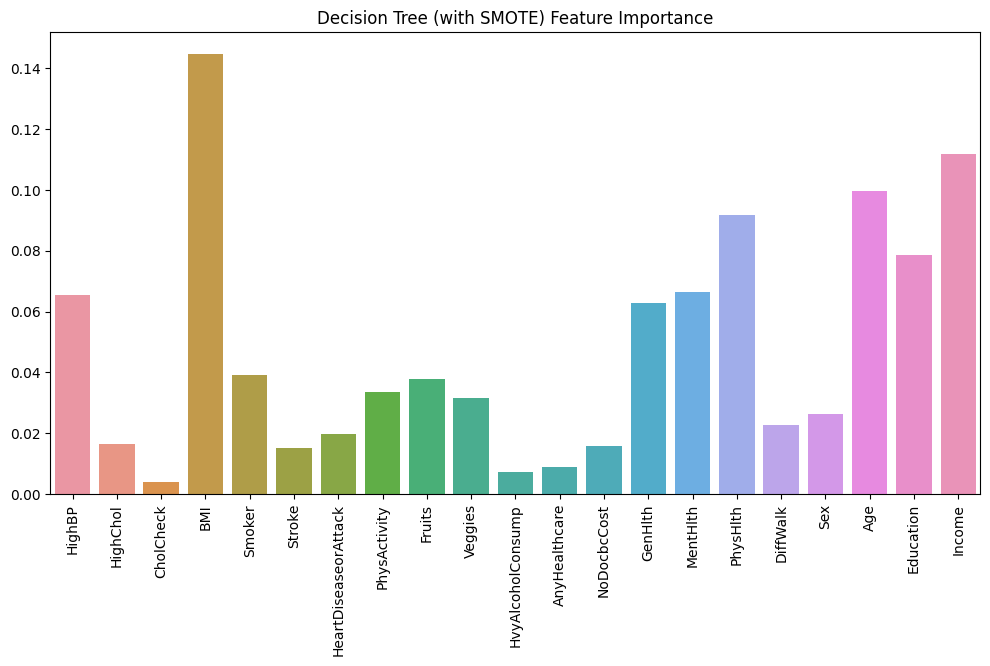

In [15]:
features = X_dev.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = clf_tuned_smote.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)
ax.set(title = "Decision Tree (with SMOTE) Feature Importance")

# Random Forests without Smote

###  Train a Random Forest model on the development dataset using RandomForestClassifier with default parameters

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_dev, y_dev)

y_pred_dev_rfc = rfc.predict(X_dev)
y_pred_test_rfc = rfc.predict(X_test)

dev_acc_rfc = sum(np.where(y_pred_dev_rfc == y_dev, 1, 0))/y_dev.shape[0]
test_acc_rfc = sum(np.where(y_pred_test_rfc == y_test, 1, 0))/y_test.shape[0]

print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     38813
         1.0       0.46      0.16      0.24      7082

    accuracy                           0.84     45895
   macro avg       0.66      0.56      0.58     45895
weighted avg       0.80      0.84      0.81     45895



Development Set:
Accuracy : 0.9946
Precision :  0.9944578288643855
Recall :  0.9846965252349573
F1 Score :  0.9895027099329943


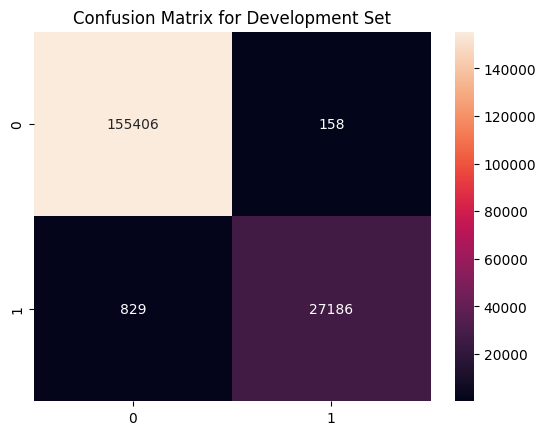

Test Set Analysis:
Accuracy on : 0.8412
Precision :  0.661416536844829
Recall :  0.564691724597583
F1 Score :  0.5769171629777883


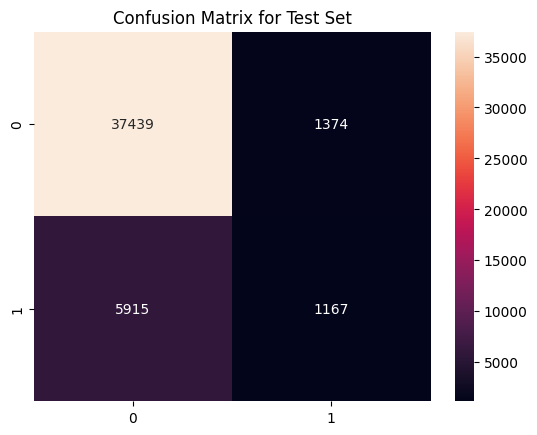

In [17]:
print("Development Set:")
print("Accuracy : {:0.4f}".format(dev_acc_rfc))
scores = precision_recall_fscore_support(y_dev, y_pred_dev_rfc, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_dev, y_pred_dev_rfc)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Development Set")
plt.show()

print("Test Set Analysis:")
print("Accuracy on : {:0.4f}".format(test_acc_rfc))
scores = precision_recall_fscore_support(y_test, y_pred_test_rfc, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_test, y_pred_test_rfc)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Test Set")
plt.show()

## Hyperparameters

Choose 1.number of estimators and 2.maximum depths as hyperparameters.

In [18]:
num_est = [100, 200, 300]
max_depths = [5, 10, 20]

params = {'n_estimators' : num_est,
         'max_depth': max_depths,}

rfc_tuned = GridSearchCV(RandomForestClassifier(), params, cv = 3, verbose = 5, scoring = 'recall')
rfc_tuned.fit(X_dev, y_dev)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=0.016 total time=   2.5s
[CV 2/3] END .....max_depth=5, n_estimators=100;, score=0.013 total time=   2.5s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=0.008 total time=   2.6s
[CV 1/3] END .....max_depth=5, n_estimators=200;, score=0.014 total time=   4.9s
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=0.012 total time=   5.1s
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.016 total time=   5.1s
[CV 1/3] END .....max_depth=5, n_estimators=300;, score=0.015 total time=   7.6s
[CV 2/3] END .....max_depth=5, n_estimators=300;, score=0.007 total time=   7.5s
[CV 3/3] END .....max_depth=5, n_estimators=300;, score=0.020 total time=   7.5s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.094 total time=   4.3s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.090 total time=   4.2s
[CV 3/3] END ....max_depth=10, n_estimators=100;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=5)

## Report optimal hyperparameters and performance of the optimal model

In [19]:
best = rfc_tuned.best_params_
print("Best Hyperparameters : ", best)

print(classification_report(y_test, rfc_tuned.predict(X_test)))

Best Hyperparameters :  {'max_depth': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38813
         1.0       0.54      0.15      0.23      7082

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895



## Feature Importance

[Text(0.5, 1.0, 'Random Forests (without SMOTE) Feature Importance')]

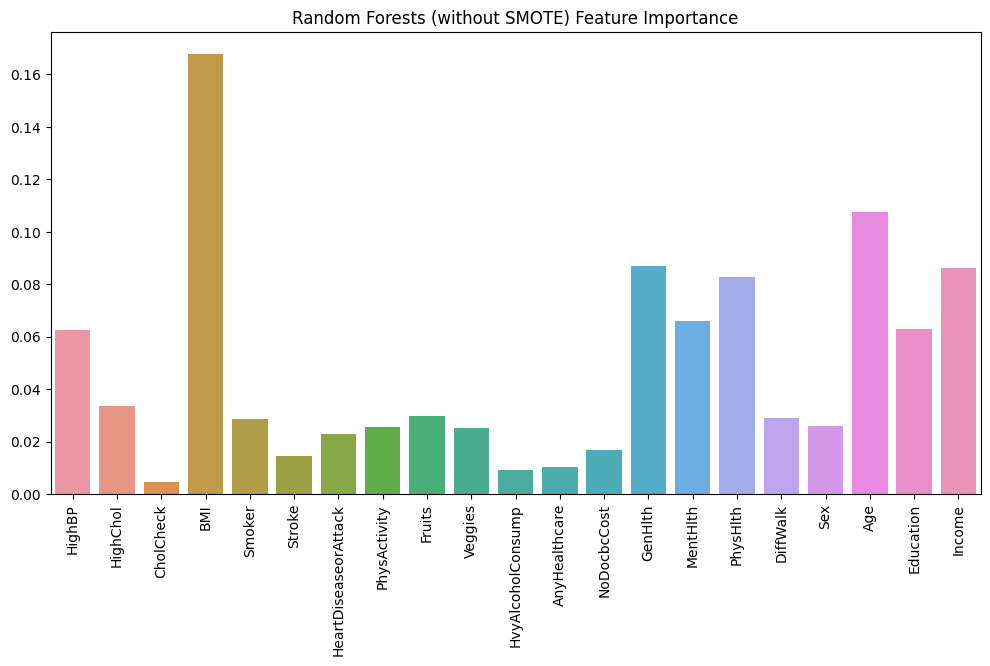

In [20]:
features = X_dev.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = rfc_tuned.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)
ax.set(title = "Random Forests (without SMOTE) Feature Importance")

# Random Forests with Smote

In [21]:
smote = SMOTE(random_state = 42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print("There are "+str(y_dev_smote.value_counts()[1])+" positive and "
     +str(y_dev_smote.value_counts()[0])+" negative labels after SMOTE.")
print("The shape of development dataset is: "+str(X_dev_smote.shape))
y_dev_smote.value_counts()

There are 155564 positive and 155564 negative labels after SMOTE.
The shape of development dataset is: (311128, 21)


1.0    155564
0.0    155564
Name: Diabetes_binary, dtype: int64

###  Train a Random Forest model on the SMOTE development dataset using RandomForestClassifier with default parameters

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_dev_smote, y_dev_smote)

y_pred_dev_rfc_smote = rfc.predict(X_dev)
y_pred_test_rfc_smote = rfc.predict(X_test)

dev_acc_rfc_smote = sum(np.where(y_pred_dev_rfc_smote == y_dev, 1, 0))/y_dev.shape[0]
test_acc_rfc_smote = sum(np.where(y_pred_test_rfc_smote == y_test, 1, 0))/y_test.shape[0]

print(classification_report(y_test, y_pred_test_rfc_smote))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     38813
         1.0       0.45      0.19      0.27      7082

    accuracy                           0.84     45895
   macro avg       0.66      0.57      0.59     45895
weighted avg       0.80      0.84      0.81     45895



Development Set:
Accuracy : 0.9946
Precision :  0.9944578288643855
Recall :  0.9846965252349573
F1 Score :  0.9895027099329943


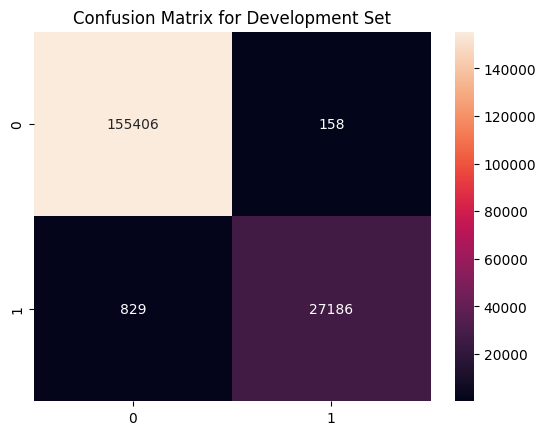

Test Set Analysis:
Accuracy : 0.8412
Precision :  0.661416536844829
Recall :  0.564691724597583
F1 Score :  0.5769171629777883


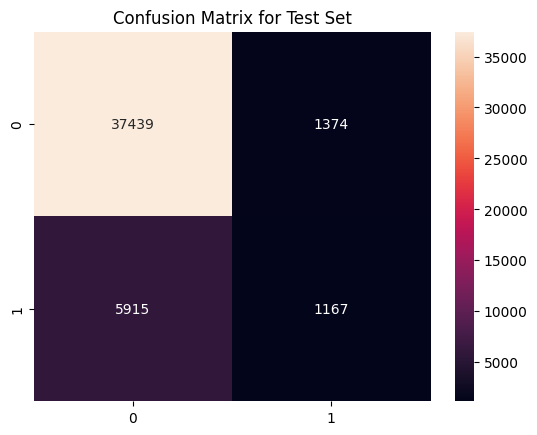

In [23]:
print("Development Set:")
print("Accuracy : {:0.4f}".format(dev_acc_rfc))
scores = precision_recall_fscore_support(y_dev, y_pred_dev_rfc, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_dev, y_pred_dev_rfc)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Development Set")
plt.show()

print("Test Set Analysis:")
print("Accuracy : {:0.4f}".format(test_acc_rfc))
scores = precision_recall_fscore_support(y_test, y_pred_test_rfc, average = 'macro')
print("Precision : ", scores[0])
print("Recall : ", scores[1])
print("F1 Score : ", scores[2])
cf = confusion_matrix(y_test, y_pred_test_rfc)
sns.heatmap(cf, annot = True, fmt = 'g')
plt.title("Confusion Matrix for Test Set")
plt.show()

## Hyperparameters

Choose 1.number of estimators and 2.maximum depths as hyperparameters.

In [24]:
num_est = [100, 200, 300]
max_depths = [5, 10, 20]

params = {'n_estimators' : num_est,
         'max_depth': max_depths,}

rfc_tuned = GridSearchCV(RandomForestClassifier(), params, cv = 3, verbose = 5, scoring = 'recall')
rfc_tuned.fit(X_dev_smote, y_dev_smote)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=0.700 total time=   6.8s
[CV 2/3] END .....max_depth=5, n_estimators=100;, score=0.895 total time=   6.0s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=0.891 total time=   6.2s
[CV 1/3] END .....max_depth=5, n_estimators=200;, score=0.701 total time=  13.4s
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=0.893 total time=  12.5s
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.891 total time=  12.7s
[CV 1/3] END .....max_depth=5, n_estimators=300;, score=0.698 total time=  20.7s
[CV 2/3] END .....max_depth=5, n_estimators=300;, score=0.899 total time=  19.1s
[CV 3/3] END .....max_depth=5, n_estimators=300;, score=0.887 total time=  18.7s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.634 total time=  10.7s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.948 total time=   9.6s
[CV 3/3] END ....max_depth=10, n_estimators=100;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=5)

## Report optimal hyperparameters and performance of the optimal model

In [25]:
best_smote = rfc_tuned.best_params_
print("Best Hyperparameters : ", best_smote)
print(classification_report(y_test, rfc_tuned.predict(X_test)))

Best Hyperparameters :  {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88     38813
         1.0       0.40      0.52      0.45      7082

    accuracy                           0.81     45895
   macro avg       0.65      0.69      0.67     45895
weighted avg       0.83      0.81      0.81     45895



## Feature Importance

[Text(0.5, 1.0, 'Random Forests (with SMOTE) Feature Importance')]

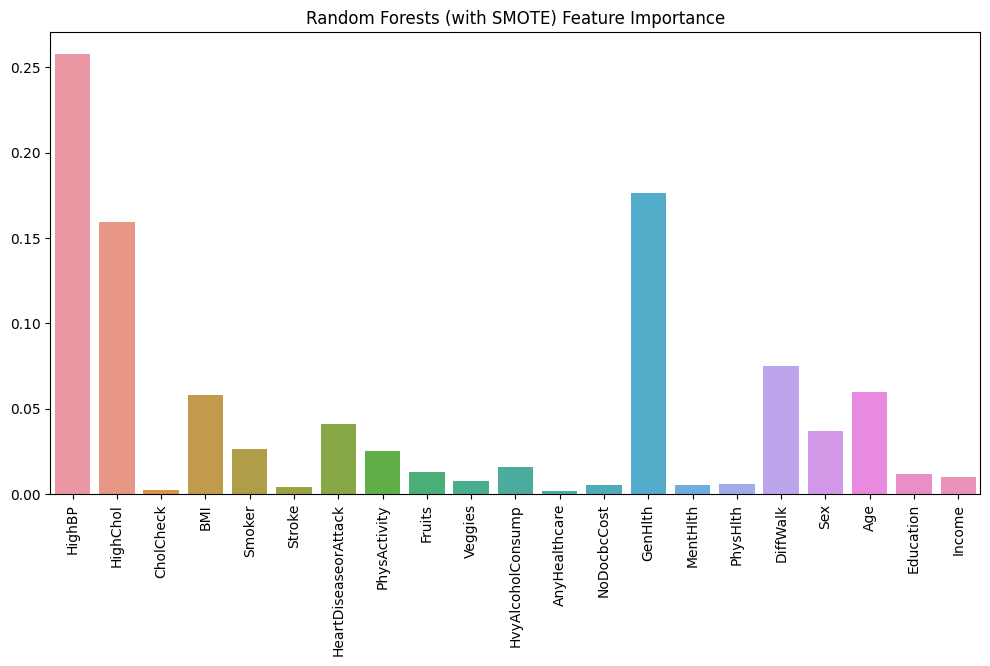

In [26]:
features = X_dev.columns.values
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = features, y = rfc_tuned.best_estimator_.feature_importances_)
ax.tick_params(axis = 'x', rotation = 90)
ax.set(title = "Random Forests (with SMOTE) Feature Importance")